In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C://Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/data/data.csv',index_col='Date',parse_dates=True)
df.head()

,Close
Date,
2012-02-16,15.076406
2012-02-17,15.073701
2012-02-20,15.073701
2012-02-21,15.455858
2012-02-22,15.401523


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
df1 = df.copy()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
training_size = int(len(df1)*0.7)
testing_size = len(df1) - training_size
training_size, testing_size

(2500, 1072)

In [6]:
train, test = df1[:training_size], df1[training_size:]
print(train.shape, test.shape)

(2500, 1) (1072, 1)


In [7]:
def create_dataset(dataset, time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
time_step=60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [9]:
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')

X_train shape : (2439, 60)
y_train shape : (2439,)


In [10]:
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

X_test shape : (1011, 60)
y_test shape : (1011,)


In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - loss: 1.8822e-04 - val_loss: 0.0014
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 1.5499e-04 - val_loss: 0.0016
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 1.3216e-04 - val_loss: 0.0019
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 1.2567e-04 - val_loss: 0.0017
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 1.2121e-04 - val_loss: 0.0017
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 1.2145e-04 - val_loss: 0.0025
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 1.1619e-04 - val_loss: 0.0021
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 1.1892e-04 - val_loss: 0.0022
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 1.0591e-04 - val_loss: 0.0015
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - loss: 1.1813e-04 - val_loss: 0.0016


In [16]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [17]:
yhat_train=scaler.inverse_transform(yhat_train)
yhat_test=scaler.inverse_transform(yhat_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
mae = mean_absolute_error(y_train, yhat_train)
rmse = np.sqrt(mean_squared_error(y_train, yhat_train))
r2 = r2_score(y_train, yhat_train)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 43.8144
RMSE: 55.3192
R²: -162941.8754


In [20]:
mae = mean_absolute_error(y_test, yhat_test)
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
r2 = r2_score(y_test, yhat_test)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 180.2923
RMSE: 182.7802
R²: -1895249.4356


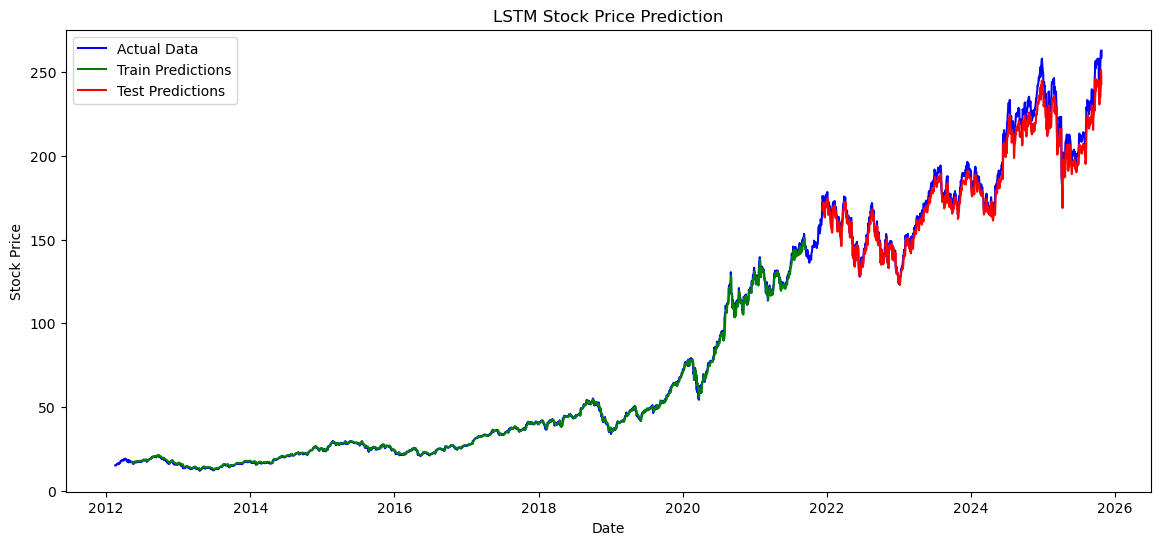

In [21]:
look_back = 60

# Prepare train predictions plot
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(yhat_train)+look_back, :] = yhat_train

# Prepare test predictions plot
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(look_back*2)+1:len(df1)-1, :] = yhat_test

# Use dates from original df as x-axis
dates = df.index

# Plot
plt.figure(figsize=(14,6))
plt.plot(dates, scaler.inverse_transform(df1), label='Actual Data', color='blue')
plt.plot(dates, trainPredictPlot, label='Train Predictions', color='green')
plt.plot(dates, testPredictPlot, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


In [22]:
# Get the last 'look_back' data points from your scaled array
last_sequence = df1[-look_back:]

In [23]:
future_days = 15
future_predictions = []

current_seq = last_sequence.copy()

for _ in range(future_days):
    # Reshape to (1, timesteps, features)
    input_seq = current_seq.reshape(1, look_back, 1)
    
    # Predict next value
    next_pred = model.predict(input_seq, verbose=0)
    
    # Append prediction to the list
    future_predictions.append(next_pred[0,0])
    
    # Update the sequence: drop first value, append predicted
    current_seq = np.append(current_seq[1:], next_pred[0,0])

In [24]:
future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions = scaler.inverse_transform(future_predictions)

In [25]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Create a dataframe for future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Price'])

In [26]:
look_back = 60
future_days = 90  # number of future days to predict

# Prepare train predictions plot
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(yhat_train)+look_back, :] = yhat_train

# Prepare test predictions plot
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(yhat_train)+(look_back*2)+1:len(df1)-1, :] = yhat_test

# Predict future values recursively
last_sequence = df1[-look_back:]  # last look_back points from scaled data
future_predictions = []

current_seq = last_sequence.copy()
for _ in range(future_days):
    input_seq = current_seq.reshape(1, look_back, 1)
    next_pred = model.predict(input_seq, verbose=0)
    future_predictions.append(next_pred[0,0])
    current_seq = np.append(current_seq[1:], next_pred[0,0])

# Inverse transform future predictions
future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

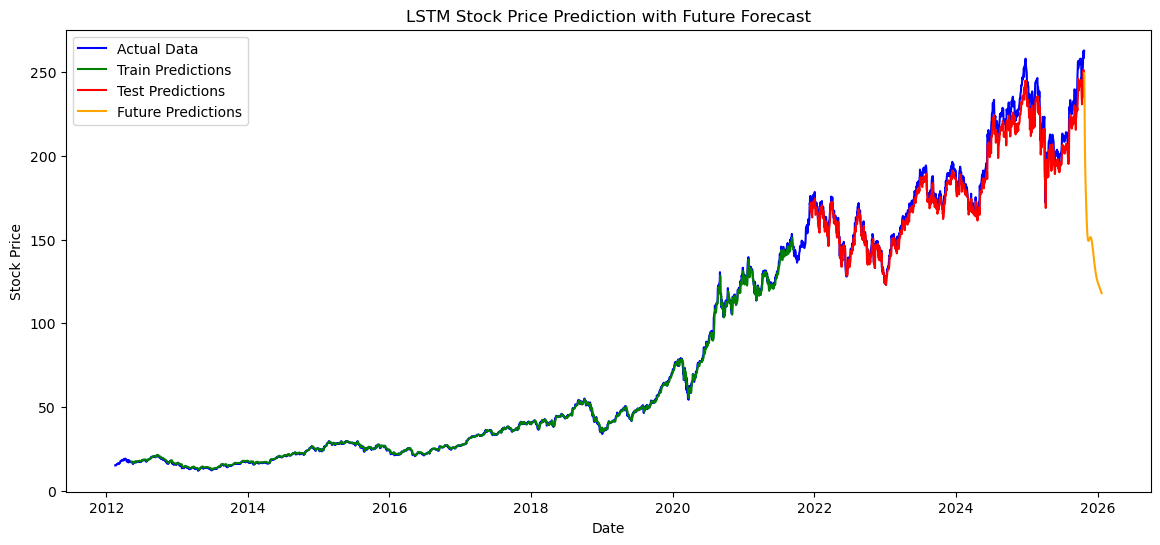

In [27]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(df.index, scaler.inverse_transform(df1), label='Actual Data', color='blue')
plt.plot(df.index, trainPredictPlot, label='Train Predictions', color='green')
plt.plot(df.index, testPredictPlot, label='Test Predictions', color='red')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction with Future Forecast')
plt.legend()
plt.show()

In [30]:
model.save("C://Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/lstm_model.h5")

In [31]:
import pickle

with open("C://Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)